## This tutorial introduces XArray, a Python library for working with labeled multidimensional arrays.

#### DEA uses XArray as its data model. To better understand what it is, let first do a simple experiment using a combination of plain numpy arrays and Python dictionaries.

#### Suposse we have a satellite image with three bands: Red, NIR and SWIR. These bands are represented as 2-dimensional numpy arrays and the latitude and longitude coordinates for each dimension are represented using 1-dimensional arrays. Finally, we also have some metadata that comes with this image.

In [14]:
import numpy as np

red = np.random.rand(250,250)
nir = np.random.rand(250,250)
swir = np.random.rand(250,250)

lats = np.linspace(-23.5, -26.0, num=red.shape[0], endpoint=False)
lons = np.linspace(110.0, 112.5, num=red.shape[1], endpoint=False)

title = "Image of the desert"
date = "2019-11-10"

image = {"red": red,
         "nir": nir,
         "swir": swir,
         "latitude": lats,
         "longitude": lons,
         "title": title,
         "date": date}

2019-11-10


0.5008503971501643

#### All our data is conveniently packed in a dictionary. Now we can use this dictionary to work with the data it contains:

In [15]:
print(image["date"])
image["red"].mean()

2019-11-10


0.5008503971501643

#### Still, to select data we have to use numpy indexes. Wouldn't it be convenient to be able to select data from the images using the coordinates of the pixels instead of their relative positions?

#### This is exactly what XArray solves! Let's see how it works:

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

import xarray as xr

#### To explore XArray we have a file containing some reflectance data of Canberra that has been generated using the DEA library.

#### The object that we get `ds` is a XArray `Dataset`, which in some ways is very similar to the dictionary that we created before, but with lots of convenient functionality available.

In [18]:
ds = xr.open_dataset('data/canberra_ls8.nc')

ds

<xarray.Dataset>
Dimensions:    (latitude: 320, longitude: 320, time: 2)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2017-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Data variables:
    crs        int32 ...
    blue       (time, latitude, longitude) float32 ...
    green      (time, latitude, longitude) float32 ...
    red        (time, latitude, longitude) float32 ...
    nir        (time, latitude, longitude) float32 ...
    swir1      (time, latitude, longitude) float32 ...
    swir2      (time, latitude, longitude) float32 ...
Attributes:
    date_created:           2019-10-18T11:27:53.613700
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.7+1...
    geospatial_bounds:      POLYGON ((149.08 -35.34,149.08 -35.26,149.16 -35....
    geospatial_bounds_crs:  EPSG:4326
    geospat

#### This figure, from the documentation page is quite ilustrative:

<img src="data/dataset-diagram.png" alt="drawing" width="600" align="left"/>

#### A `Dataset` can be seen as a dictionary structure packing up the data, dimensions and attributes.

#### Variables in a `Dataset` object are called `DataArrays` and they share dimensions with the higher level `Dataset`

#### To access a variable we can access as if it were a Python dictionary, or using the `.` notation, which is more convenient.

In [3]:
ds["green"]

#or alternatively 

ds.green

<xarray.DataArray 'green' (time: 2, latitude: 320, longitude: 320)>
[204800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2017-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

#### Dimensions are also stored as numeric arrays

In [12]:
ds['time']

#or alternatively 

ds.time

<xarray.DataArray 'time' (time: 2)>
array(['2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2017-01-01
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

#### Metadata is referred as Attributes and is internally stored under `.attrs`, but the same convenient `.` notation applies to them.

In [18]:
ds.attrs['Conventions']

#or alternatively 

ds.Conventions

'CF-1.6, ACDD-1.3'

#### DataArrays store their data internally as multidimensional numpy arrays. But these arrays contain dimensions or labels that make it easier handle the data. To access the underlaying numpy array of a `DataArray` we can use the `.values` notation.

In [22]:
arr = ds.green.values

type(arr), arr.shape

(numpy.ndarray, (2, 320, 320))

#### XArray offers two different ways of selecting data:
* `isel()`: For selecting data based on its index (like numpy).
* `sel()`: For selecting data based on its dimension of label value.

In [23]:
print(ds.time.values)

ss = ds.green.isel(time=0)

ss

['2016-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000']


<xarray.DataArray 'green' (latitude: 320, longitude: 320)>
array([[882., 911., 865., ..., 936., 925., 954.],
       [764., 872., 898., ..., 969., 969., 930.],
       [832., 897., 897., ..., 988., 901., 901.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

In [26]:
ss = ds.green.sel(time=datetime(2016,1,1))

ss

<xarray.DataArray 'green' (latitude: 320, longitude: 320)>
array([[882., 911., 865., ..., 936., 925., 954.],
       [764., 872., 898., ..., 969., 969., 930.],
       [832., 897., 897., ..., 988., 901., 901.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

In [29]:
ss = ds.green.sel(time=datetime(2016,1,1), latitude=slice(-35.30,-35.24))

ss

<xarray.DataArray 'green' (latitude: 160, longitude: 320)>
array([[313., 313., 305., ..., 575., 413., 422.],
       [317., 316., 311., ..., 621., 476., 414.],
       [314., 318., 316., ..., 492., 492., 367.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.3 -35.3 -35.3 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

#### Xarray exposes lots of functions to easily transform and analyse `Datasets` and `DataArrays`. For example to calculate the spatial mean of the green band 

In [32]:
print("Mean of green band:", ds.green.mean())
print("Standard deviation of green band:", ds.green.std())
print("Sum of green band:", ds.green.sum())

Mean of green band: <xarray.DataArray 'green' ()>
array(692.3445, dtype=float32)
Standard deviation of green band: <xarray.DataArray 'green' ()>
array(313.62076, dtype=float32)
Sum of green band: <xarray.DataArray 'green' ()>
array(1.417921e+08, dtype=float32)


#### Plotting is also conveniently integrated in the library.

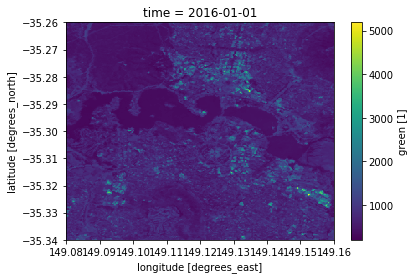

In [9]:
ds["green"].isel(time=0).plot()

#### But we still can do things manually using numpy and matplotlib

float32
float32


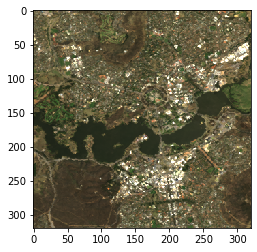

In [27]:
rgb = np.dstack((ds.red.isel(time=0).values, ds.green.isel(time=0).values, ds.blue.isel(time=0).values))
rgb = np.clip(rgb, 0, 2000) / 2000

plt.imshow(rgb)

#### Exercise: Use the `.sel()` functionality over the previous image to plot the region defined in the following WKT for 2017:
`POLYGON ((149.1 -35.29, 149.13 -35.29, 149.13 -35.27, 149.1 -35.27, 149.1 -35.29))`

#### Can you create an NDVI representation of this image?